## Assignment 1 Clustering

### 1)
Suppose that the data mining task is to cluster the following eight points (with (x, y) representing location) into three clusters:

A1(2, 10), A2(2, 5), A3(8, 4), B1(5, 8), B2(7, 5), B3(6, 4), C1(1, 2), C2(4, 9):

The distance function is Euclidean distance. Suppose initially we assign A1, B1, and C1 as the center of each cluster, respectively. Use the k-means algorithm to show only

(a) The three cluster centers after the first round execution

(b) The final three clusters

In [1]:
# import libraries for data store and graph plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

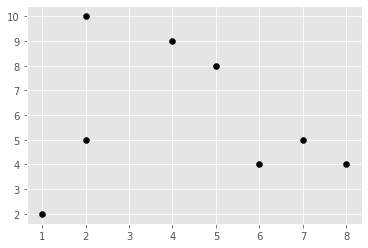

In [2]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

# plot current input data
plt.scatter(X[:,0], X[:,1], c='black')
plt.show()

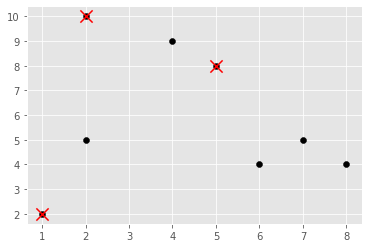

In [3]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

centroids = np.array([[2,10],
              [5,8],
              [1,2]])

# plot current input data with centroids
plt.scatter(X[:,0], X[:,1], c='black')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=150, marker='x')
plt.show()

In [4]:
class KMeans:
    def __init__(self, k=3, tolerance=0, max_iterations=500):
        self.k = k # no. of clusters
        self.tolerance = tolerance # tolerance set to 0. Small dataset
        self.max_iterations = max_iterations # no. of times the code will run
    
    def calc_distance(self, X1, X2):
        # calculate euclidean distance
        return (sum((X1 - X2)**2))**0.5
    
    def fit(self, data, centroids):
        self.centroids = {}
        # initialize the centroids, using the provided input
        for i in range(self.k):
            self.centroids[i] = centroids[i]
            
        # begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []
                
            # find the distance between the point and the cluster
            # choose the nearest centroid
            for features in data:
                distances = [self.calc_distance(features, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                
            previous = dict(self.centroids)
            
            # take the average of the cluster datapoints
            # recalculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis=0)
                
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            # break out of the main loop if the results are optimal
            # ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break
               

In [5]:
def plot_graph(km):
    colors = 10*["r", "g", "c", "b", "k"]
    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x')
    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)
    plt.show()

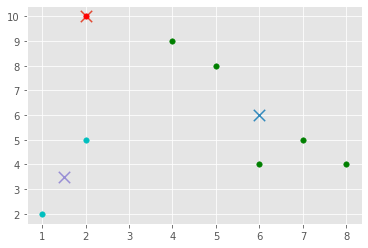

Centroids:
[ 2. 10.]
[6. 6.]
[1.5 3.5]


In [6]:
# solves (a) run for only one iteration
km = KMeans(3,0,1)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)

print('Centroids:')
for centroid in km.centroids:
    print(km.centroids[centroid])

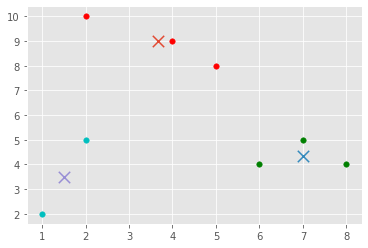

Centroids:
[3.66666667 9.        ]
[7.         4.33333333]
[1.5 3.5]


In [7]:
# solves (b)
km = KMeans(3)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)

print('Centroids:')
for centroid in km.centroids:
    print(km.centroids[centroid])

### 2) 
Write a program to implement k-means clustering algorithm by using Iris data set (available in UCI Machine learning repository) and find the followings:

i) Clusters of the Iris data set (final clustering solution). 

ii) Sum of the Intra-Cluster Distances (SICD) or Sum of the Squired Error (SSE) valuesof the obtained clustering solution. 

iii)Graphical representation of the obtained clusters.

iv)Give 150 iterations of theimplemented k-means by changing the initial centroids and see the changes in the clusteringsolution(SICD values).

v)Plot iteration vs. SICD values.

In [8]:
import pandas as pd
from sklearn import datasets
from sklearn.utils import shuffle

iris = datasets.load_iris()
print(iris.DESCR)

# reading and shuffling input
X, y = shuffle(iris.data, iris.target, random_state=1126) # random_state is done so that results can be reporduced
# easier access
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
import matplotlib.patches as mpatches

# plot actual clusters
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

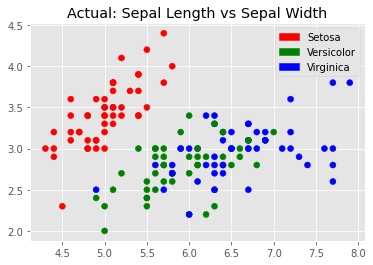

In [10]:
plt.scatter(X['Sepal Length'], X['Sepal Width'], c=colors[y['Target']])
plt.title('Actual: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

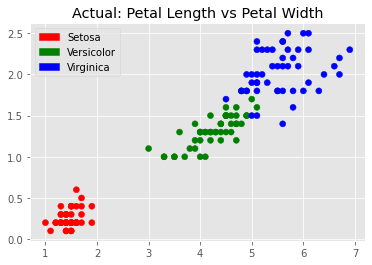

In [11]:
plt.scatter(X['Petal Length'], X['Petal Width'], c=colors[y['Target']])
plt.title('Actual: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

In [12]:
class K_Means:
    def __init__(self, k=3, tolerance=0, max_iterations=500):
        self.k = k # no. of clusters
        self.tolerance = tolerance # tolerance set to 0. Small dataset
        self.max_iterations = max_iterations # no. of times the code will run
    
    def calc_distance(self, X1, X2):
        # calculate euclidean distance
        return (sum((X1 - X2)**2))**0.5
    
    def fit(self, data, centroids):
        self.centroids = {}
        # initialize the centroids, using the provided input
        for i in range(self.k):
            self.centroids[i] = centroids[i]
            
        self.sicd = []
        # begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []
                
            # find the distance between the point and the cluster
            # choose the nearest centroid
            sicd = 0
            for features in data:
                distances = [self.calc_distance(features, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                self.pred.append(classification)
                sicd += min(distances)
                
            self.sicd.append(sicd)
            previous = dict(self.centroids)
            
            # take the average of the cluster datapoints
            # recalculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis=0)
                
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            # break out of the main loop if the results are optimal
            # ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break
               

In [13]:
# K means clustering on iris dataset
km = K_Means(3, 0.0001, 500)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=1608)
km.fit(X.values, centroids.values)

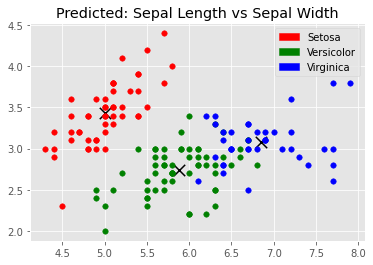

Centroids: [Sepal Length, Sepal Width]
[5.006 3.428] Setosa
[5.88360656 2.74098361] Versicolor
[6.85384615 3.07692308] Virginica


In [14]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)

plt.title('Predicted: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Sepal Length, Sepal Width]')
print(km.centroids[0][:2], 'Setosa')
print(km.centroids[1][:2], 'Versicolor')
print(km.centroids[2][:2], 'Virginica')

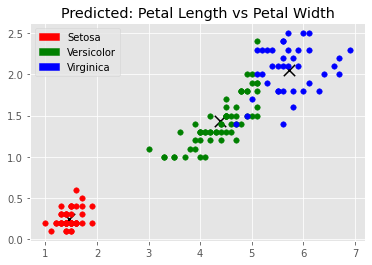

Centroids: [Petal Length, Petal Width]
[1.462 0.246] Setosa
[4.38852459 1.43442623] Versicolor
[5.71538462 2.05384615] Virginica


In [15]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[2], features[3], color=color, s=30)

plt.title('Predicted: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Petal Length, Petal Width]')
print(km.centroids[0][2:4], 'Setosa')
print(km.centroids[1][2:4], 'Versicolor')
print(km.centroids[2][2:4], 'Virginica')

In [16]:
print('SICD Error:')
print(km.sicd[-1])

SICD Error:
97.22486903387323


In [17]:
print('Actual: ')
print(y.values.flatten())
print('Predicted: ')
print(np.array(km.pred))

Actual: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 2 1 2 0 2 0 1 0 2 2 1 1 0 2 2
 1 2 0 0 1 2 0 0 1 0 0 0 1 2 1 2 0 0 1 1 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 2 0 1 1 2 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 2 0 1 1 0 2 2 1 0 2 2 0 0 0
 1 2 0 0 1 2 2 1 2 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 2 1 2 0 2 2 2 2 0
 2 1]
Predicted: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 1 1 2 0 2 0 2 0 2 2 1 1 0 2 2
 1 2 0 0 1 1 0 0 1 0 0 0 1 1 1 2 0 0 1 2 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 1 0 1 1 1 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 1 0 1 1 0 1 2 1 0 1 2 0 0 0
 1 2 0 0 1 1 1 1 1 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 1 2 2 0 2 1 2 1 0
 2 1]


[175.42078525830775, 107.38997922720186, 98.74016756639197, 98.15643642928148, 97.94640580733717, 97.5130264123709, 97.32905724687434, 97.20584742866644, 97.12505123764721, 97.0687745622379, 97.22486903387323]


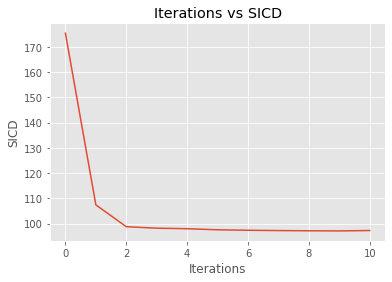

In [18]:
print(km.sicd)
# plot iterations vs SICD
plt.plot(km.sicd)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()

In [19]:
# K means clustering on iris dataset
km = K_Means(3, 0.0001, 150)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=4493)
print(centroids)
km.fit(X.values, centroids.values)

    Sepal Length  Sepal Width  Petal Length  Petal Width
1            6.0          2.7           5.1          1.6
73           6.0          2.2           4.0          1.0
16           5.5          2.4           3.8          1.1


[227.93118349817183, 129.21063700069982, 98.12324364981238, 97.27880140018452, 97.20584742866644, 97.12505123764721, 97.0687745622379, 97.22486903387323]


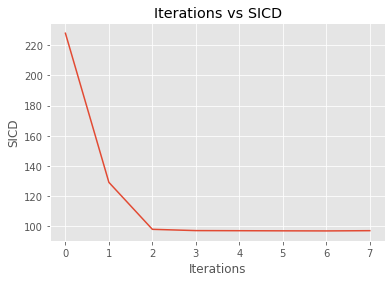

In [20]:
# SICD values
print(km.sicd)
# plot iterations vs SICD
plt.plot(km.sicd)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()

In [21]:
# K means clustering on iris dataset
km = K_Means(3, 0.0001, 150)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=7703)
print(centroids)
km.fit(X.values, centroids.values)

     Sepal Length  Sepal Width  Petal Length  Petal Width
61            6.2          3.4           5.4          2.3
122           6.5          2.8           4.6          1.5
50            5.6          2.8           4.9          2.0


[275.834872079097, 159.84212685170536, 98.54212538496537, 97.20457357401652]


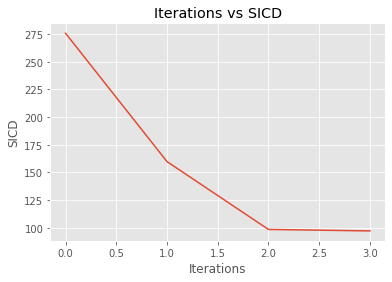

In [22]:
# SICD values
print(km.sicd)
# plot iterations vs SICD
plt.plot(km.sicd)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()